# ML Resit

Author : Etienne Chatreaux

In [2]:
# Libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
import joblib


import preprocessing as p
import pipelines as my_pipes

from sklearn.model_selection import train_test_split


dataset_path = r"data\dataset_rattrappage_june_2025.csv"

In [3]:
# Load data

dataset = pd.read_csv(dataset_path, low_memory=True)
print(dataset.shape)

(537667, 17)


# EDA

In [4]:
for col in dataset.columns:
    print(col, dataset[col].nunique(), dataset[col].unique())
    
# dataset.describe()

CODE_GENDER 2 ['F' 'M']
FLAG_OWN_CAR 2 ['Y' 'N']
FLAG_OWN_REALTY 2 ['N' 'Y']
CNT_CHILDREN 3 ['2+ children' 'No children' '1 children']
AMT_INCOME_TOTAL 195 [ 270000.    81000.   112500.   139500.   144000.   180000.   405000.
  135000.    99000.   103500.   225000.   171000.   202500.    67500.
  121500.   560250.    74250.    90000.   324000.   391500.   292500.
  229500.   157500.    94500.   148500.   450000.    45000.   382500.
  126000.   315000.   306000.   247500.   675000.    36000.   562500.
  337500.   360000.   211500.   119250.   216000.   122400.   220500.
  193500.   427500.    63000.    76500.   472500.   495000.    95850.
   54000.   459000.   540000.   265500.   146250.   108000.   283500.
  310500.   130500.   252000.   234000.   198000.   166500.   256500.
  153000.   207000.   607500.   468000.    72000.   279000.   238500.
   85500.   173250.    62653.5  445500.   117000.   184500.   261000.
  189000.   162000.   326250.   387000.   190399.5   40500.    60376.5
  5

In [5]:
# There is a column with only 1 value so we remove it

if "FLAG_MOBIL" in dataset.columns:
    cols_to_remove = ["FLAG_MOBIL"]
    dataset = dataset.drop(columns=cols_to_remove)
    print("Column removed!")

Column removed!


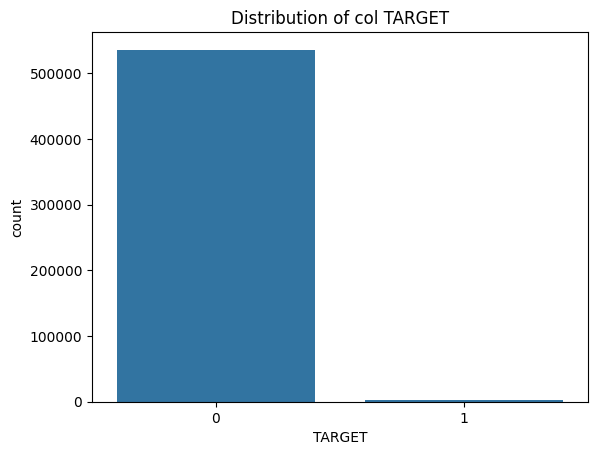

TARGET
0    99.63509
1     0.36491
Name: proportion, dtype: float64


In [6]:
target_col = 'TARGET'

sns.countplot(data=dataset, x=target_col)
plt.title(f'Distribution of col {target_col}')
plt.show()

print(dataset[target_col].value_counts(normalize=True) * 100)

In [7]:
# Preprocessing pipelines : you can check the pipelines.py file

onehot_cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'JOB']
negative_cols = ["DAYS_BIRTH", "DAYS_EMPLOYED", "BEGIN_MONTHS"]

mapping = {
    'CODE_GENDER': {'M': 1, 'F': 0},
    'FLAG_OWN_CAR': {'Y': 1, 'N': 0}, 
    'FLAG_OWN_REALTY': {'Y': 1, 'N': 0},
    'CNT_CHILDREN': {'No children': 0, '1 children': 1, '2+ children': 2},
    'NAME_EDUCATION_TYPE': {'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2, 'Higher education': 3, 'Academic degree': 4}
}

preprocessor = my_pipes.get_preprocessor(onehot_cols, mapping, negative_cols, model_type='nn')
X_transformed = preprocessor.fit_transform(dataset)

feature_names = p.get_transformed_feature_names(preprocessor, dataset, onehot_cols)
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed

# for col in X_transformed.columns:
#     if X_transformed[col].dtype != 'float64':
#         print("Error! Dataset not ready : ", col, X_transformed[col].dtype)

,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,...,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,270000.0,1.0,13258.0,2300.0,0.0,0.0,0.0,6.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,81000.0,1.0,17876.0,377.0,1.0,1.0,0.0,4.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,270000.0,3.0,19579.0,1028.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,112500.0,1.0,15109.0,1956.0,0.0,0.0,0.0,3.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,139500.0,1.0,17281.0,5578.0,1.0,0.0,0.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,166500.0,1.0,12372.0,5401.0,0.0,1.0,0.0,8.0,0.0
537663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135000.0,3.0,14160.0,4635.0,0.0,0.0,0.0,8.0,0.0
537664,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,180000.0,3.0,24204.0,2462.0,0.0,0.0,0.0,7.0,0.0
537665,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,220500.0,1.0,22647.0,3847.0,0.0,1.0,0.0,1.0,0.0


In [11]:
# Very important : visualize the data target = 1

dataset[dataset['TARGET'] == 1].describe()

display(dataset[dataset['TARGET'] == 1])

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,TARGET
102,F,N,Y,No children,90000.0,Secondary / secondary special,Civil marriage,House / apartment,-16569,-517,0,0,0,Laborers,-38,1
325,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-17300,-1235,0,0,0,Drivers,-44,1
380,F,Y,Y,1 children,265500.0,Higher education,Married,With parents,-10998,-2514,0,0,0,Accountants,-9,1
529,F,N,Y,No children,202500.0,Secondary / secondary special,Married,House / apartment,-14523,-3420,0,0,0,Core staff,-16,1
764,F,Y,Y,No children,90000.0,Secondary / secondary special,Married,House / apartment,-18950,-1002,1,1,0,Cooking staff,-35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536562,F,N,Y,No children,180000.0,Lower secondary,Widow,House / apartment,-16803,-2227,1,1,0,Cleaning staff,-35,1
537065,M,Y,N,No children,135000.0,Secondary / secondary special,Married,House / apartment,-14209,-97,0,0,0,Security staff,-34,1
537289,M,N,Y,No children,225000.0,Secondary / secondary special,Civil marriage,House / apartment,-12451,-1646,0,0,0,Sales staff,-2,1
537445,M,Y,Y,No children,225000.0,Secondary / secondary special,Married,House / apartment,-17915,-3366,0,0,0,Drivers,-30,1


In [10]:
dataset.describe()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
count,5.376670e+05,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000
mean,1.971171e+05,-15010.958999,-2762.029935,0.281615,0.298893,0.100730,-19.305241,0.003649
std,1.041390e+05,3416.418092,2393.919456,0.449787,0.457773,0.300971,14.037827,0.060298
min,2.700000e+04,-24611.000000,-15713.000000,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,1.350000e+05,-17594.000000,-3661.000000,0.000000,0.000000,0.000000,-29.000000,0.000000
50%,1.800000e+05,-14785.000000,-2147.000000,0.000000,0.000000,0.000000,-17.000000,0.000000
75%,2.295000e+05,-12239.000000,-1050.000000,1.000000,1.000000,0.000000,-8.000000,0.000000
max,1.575000e+06,-7489.000000,-17.000000,1.000000,1.000000,1.000000,0.000000,1.000000


Numerical cols:


KeyboardInterrupt: 

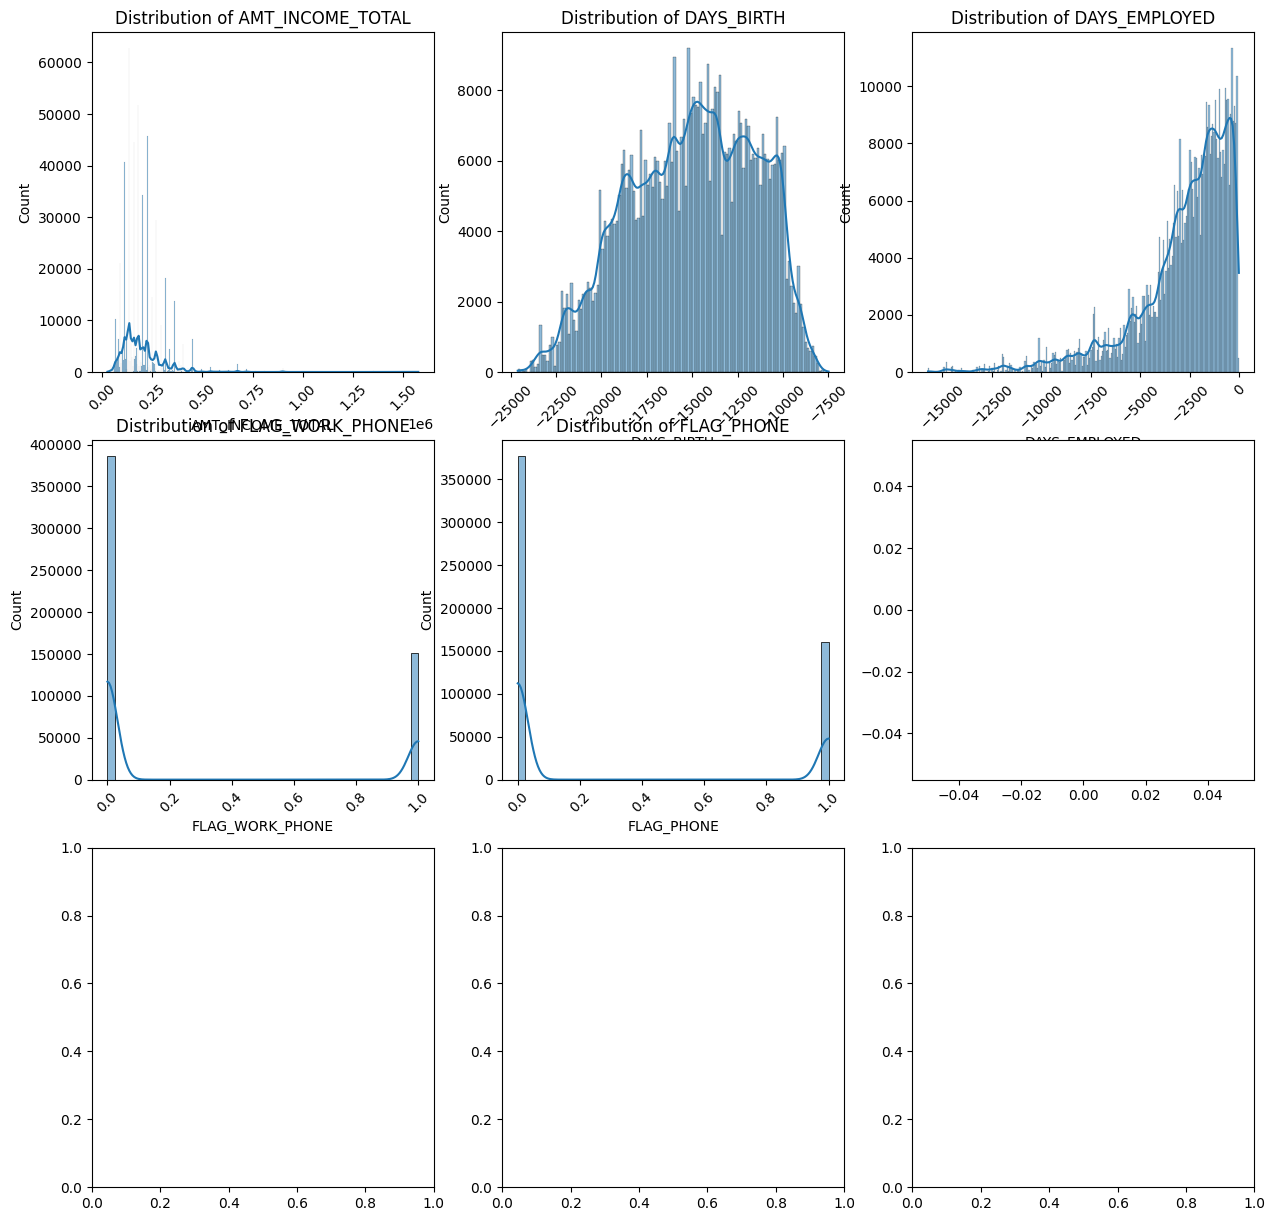

In [9]:
p.plot_distributions(dataset)

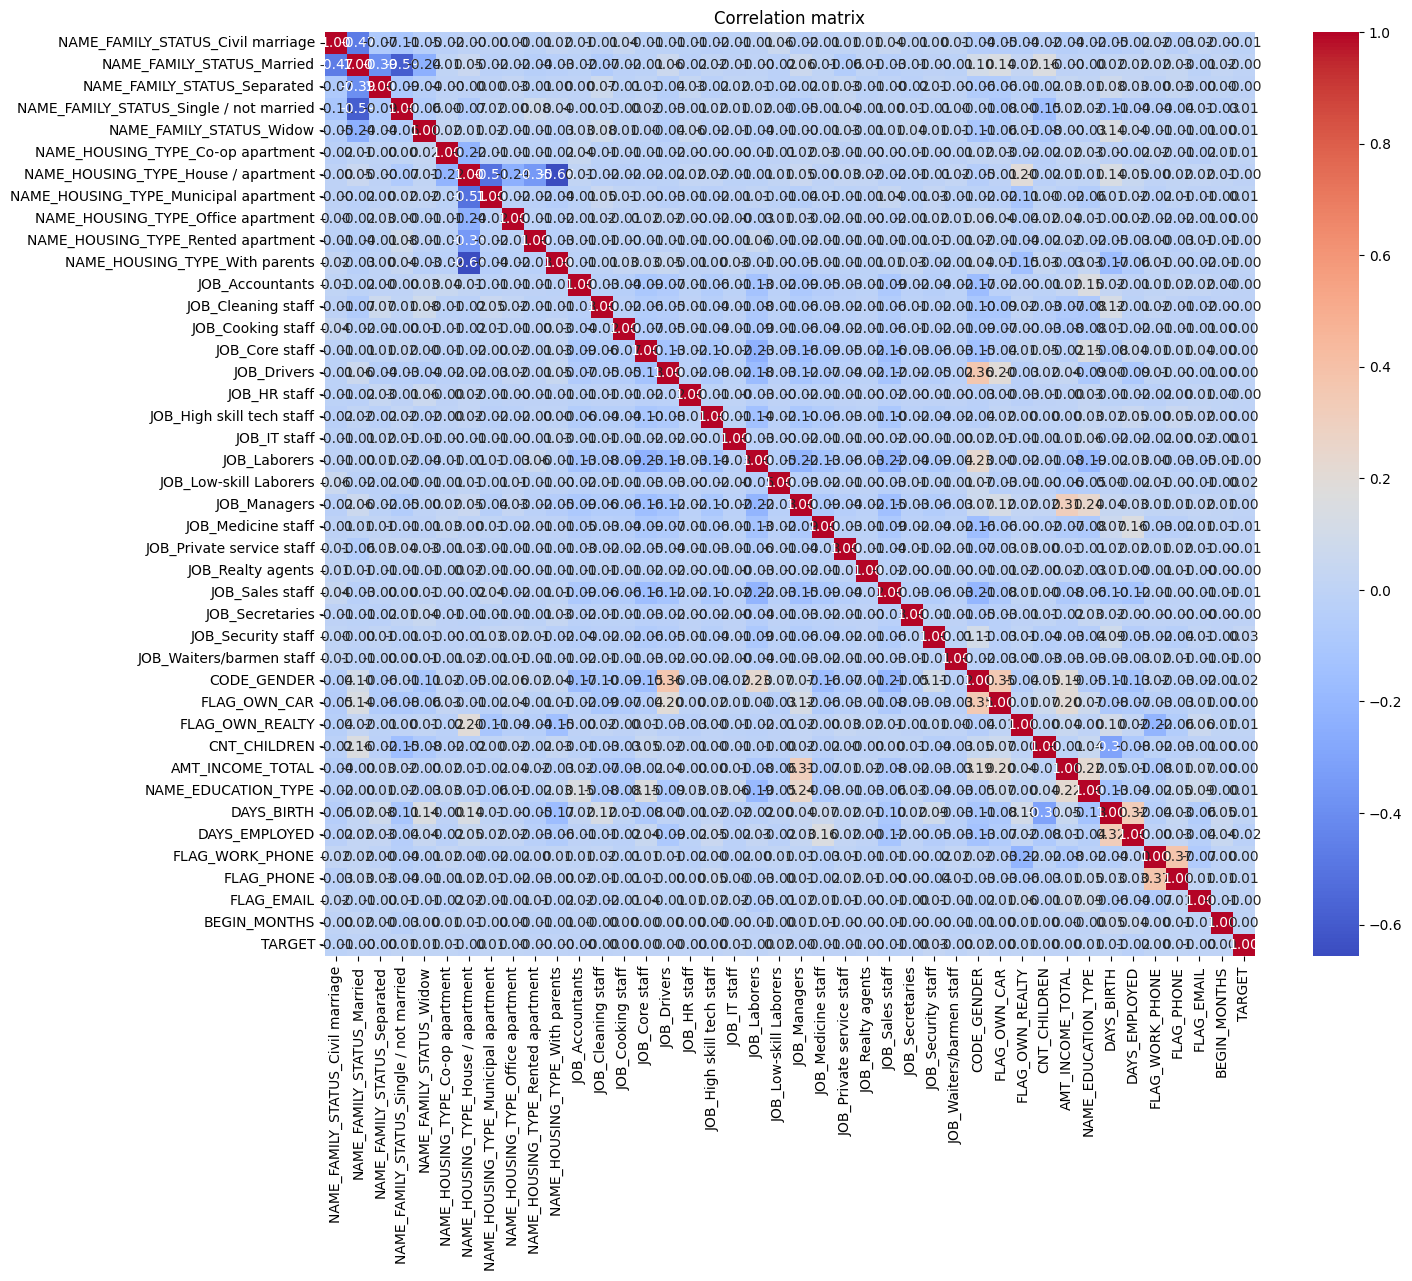

In [8]:
# It's possible to visualize the corr matrix or just the correlations with TARGET, you need to change only_target to False/True
corr_array = p.plot_correlation_matrix(X_transformed, only_target=False)

In [9]:
# I did my EDA in an other notebook but the data was pretty clean, not biased
top_correlations = p.get_top_correlations(corr_array, n_top=30)


Top 30 correlations:
NAME_HOUSING_TYPE_House / apartment -- NAME_HOUSING_TYPE_With parents: -0.657
NAME_HOUSING_TYPE_With parents -- NAME_HOUSING_TYPE_House / apartment: -0.657
NAME_FAMILY_STATUS_Married -- NAME_FAMILY_STATUS_Single / not married: -0.591
NAME_FAMILY_STATUS_Single / not married -- NAME_FAMILY_STATUS_Married: -0.591
NAME_HOUSING_TYPE_Municipal apartment -- NAME_HOUSING_TYPE_House / apartment: -0.509
NAME_HOUSING_TYPE_House / apartment -- NAME_HOUSING_TYPE_Municipal apartment: -0.509
NAME_FAMILY_STATUS_Civil marriage -- NAME_FAMILY_STATUS_Married: -0.472
NAME_FAMILY_STATUS_Married -- NAME_FAMILY_STATUS_Civil marriage: -0.472
NAME_FAMILY_STATUS_Separated -- NAME_FAMILY_STATUS_Married: -0.394
NAME_FAMILY_STATUS_Married -- NAME_FAMILY_STATUS_Separated: -0.394
FLAG_PHONE -- FLAG_WORK_PHONE: 0.372
FLAG_WORK_PHONE -- FLAG_PHONE: 0.372
JOB_Drivers -- CODE_GENDER: 0.361
CODE_GENDER -- JOB_Drivers: 0.361
NAME_HOUSING_TYPE_Rented apartment -- NAME_HOUSING_TYPE_House / apartment: -

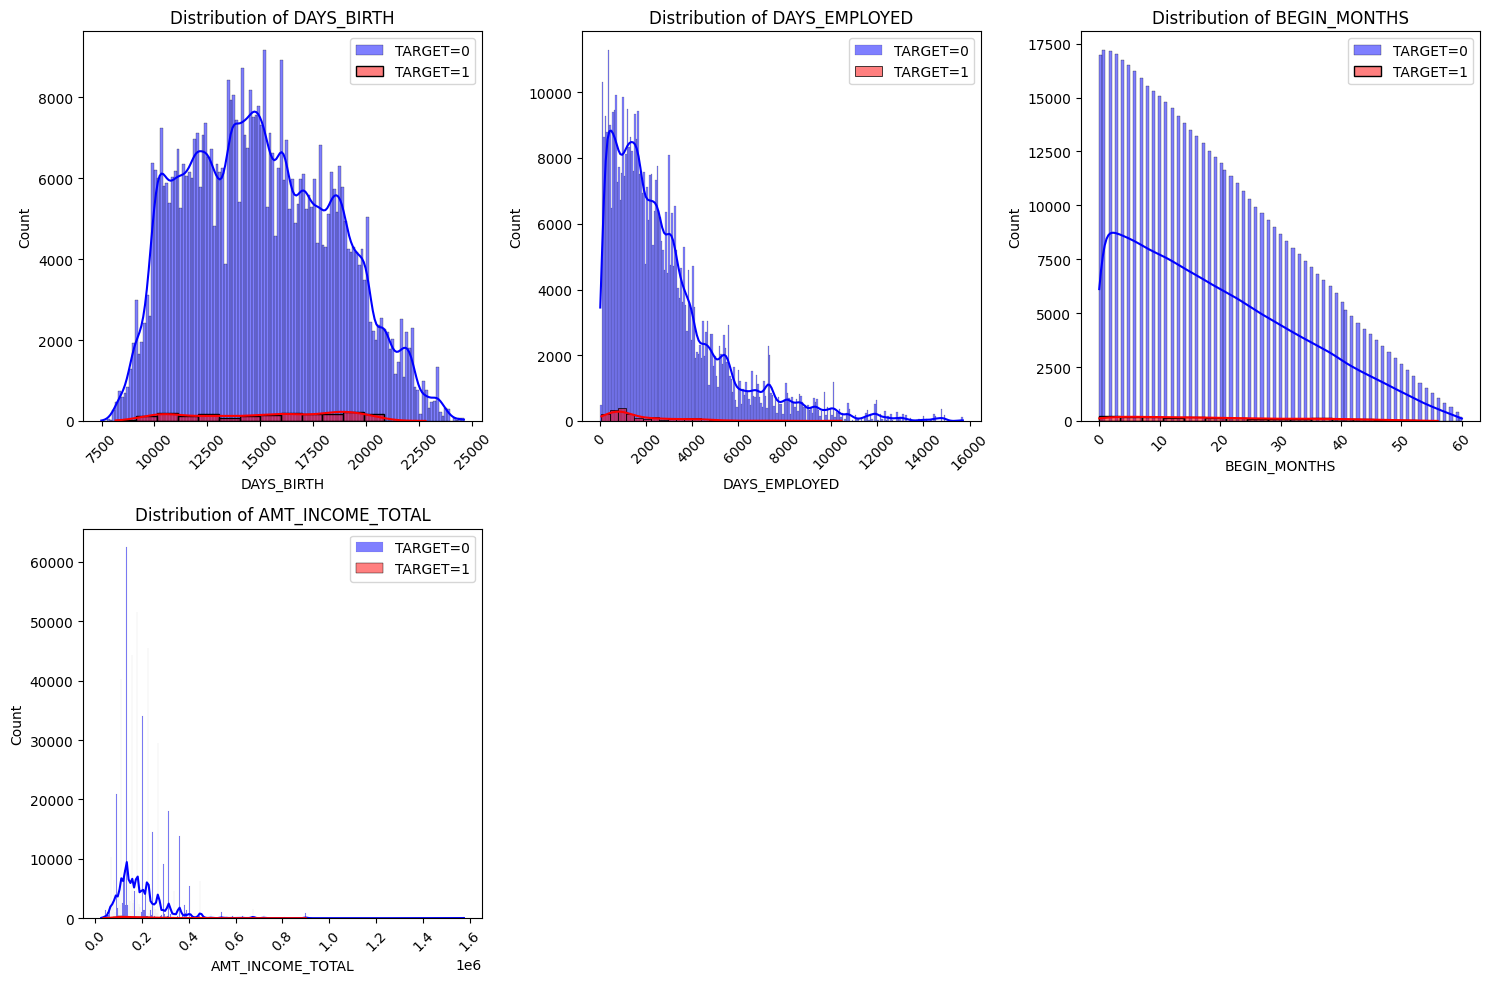

In [10]:
columns_to_plot = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'BEGIN_MONTHS', 'AMT_INCOME_TOTAL']
p.plot_distributions_by_target(X_transformed, columns_to_plot)

# Split data

In [11]:
# Split the data

X = dataset.drop(columns=['TARGET'])
y = dataset['TARGET']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Print shapes after transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("X_train_transformed:", X_train_transformed.shape)
print("X_test_transformed:", X_test_transformed.shape)

(537667, 15) (537667,)
X_train_transformed: (430133, 41)
X_test_transformed: (107534, 41)


# Random Forest

Pour rappel, on cherche à octroyer un crédit à un client. Notre priorité est donc minimiser le nombre de faux positifs

In [12]:
# Get the classic RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='none'
)

# Train and evaluate the classic model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Classic Random Forest"
)


KeyboardInterrupt: 

In [ ]:
# Get the balanced RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='balanced'
)

# Train and evaluate the balanced model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Balanced Random Forest"
)



RESULTS - Balanced Random Forest
ROC AUC: 0.9584
Precision-Recall AUC: 0.3609
CV Mean: 0.9479 (+/- 0.0147)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    107142
           1       0.12      0.81      0.21       392

    accuracy                           0.98    107534
   macro avg       0.56      0.89      0.60    107534
weighted avg       1.00      0.98      0.99    107534


Confusion Matrix:
[[104772   2370]
 [    74    318]]


In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [14]:
# Get the SMOTE RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='smote'
)

# Train and evaluate the SMOTE model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="SMOTE Random Forest"
)


TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines

In [ ]:
# Get the undersampling RF pipeline
rf_pipeline = my_pipes.get_randomforest_pipeline(
    onehot_cols=onehot_cols,
    mapping=mapping,
    negative_cols=negative_cols,
    imbalance_method='undersampling'
)

# Train and evaluate the undersampling model
results, trained_pipeline = my_pipes.evaluate_pipeline(
    rf_pipeline, 
    X_train, 
    X_test, 
    y_train, 
    y_test,
    method_name="Undersampling Random Forest"
)

TypeError: All intermediate steps of the chain should not be Pipelines